# Face recognition with ORL

## 1 - Packages ##

First, let's run the cell below to import all the packages that you will need during this assignment. 
- [numpy](www.numpy.org) is the fundamental package for scientific computing with Python.
- [matplotlib](http://matplotlib.org) is a famous library to plot graphs in Python.


In [174]:
import numpy as np
from utils import load_dataset, image_width, image_height
import matplotlib.pyplot as plt
%matplotlib inline
plt.gray()

<Figure size 432x288 with 0 Axes>

In [175]:
# Loading the ORL faces dataset
train_X_origin, train_Y, test_X_origin, test_Y = load_dataset()

print ("train_X shape: " + str(train_X.shape))
print ("train_Y shape: " + str(train_Y.shape))
print ("test_X shape: " + str(test_X.shape))
print ("test_Y shape: " + str(test_Y.shape))

train_X shape: (320, 10304)
train_Y shape: (320, 1)
test_X shape: (80, 10304)
test_Y shape: (80, 1)


In [176]:
# Let's standardize our dataset.
train_X_normalized = train_X_origin/255.
test_X_normalized = test_X_origin/255.

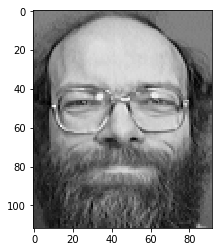

In [177]:
# Example of a picture
index = 31
plt.imshow(train_X_normalized[index].reshape(image_height, image_width))
plt.show()

In [178]:
# GRADED FUNCTION: image2vector
def image2vector(image):
    """
    Argument:
    image -- a numpy array of shape (length, height, depth)
    
    Returns:
    v -- a vector of shape (length*height*depth, 1)
    """
#     v = image.reshape((image.shape[1]*image.shape[2]), image.shape[0])
    v = image.reshape(image.shape[0], -1)
    
    return v

In [179]:
# Reshape the training and test examples so that images of size (92, 112, 1) are flattened into single vectors
train_X = image2vector(train_X_normalized) 
test_X = image2vector(test_X_normalized) 
print ("flattened train_X: " + str(train_X.shape))
print ("flattened test_X: " + str(test_X.shape))

flattened train_X: (320, 10304)
flattened test_X: (80, 10304)


In [180]:
#Euclidean distance between 2-dimensional point
def find_euclidean_distance(A, B):
    return np.sqrt(np.sum((A - B)**2))

In [181]:
distance = find_euclidean_distance(train_X[0:1], test_X[0:1])
print("Euclidean distance between first rows: ", dst)

Euclidean distance between first rows:  13.518321


In [182]:
def classify(train_data, train_labels, testData, numberOfClasses, k = 1):
    #Euclidean distance between 2-dimensional point
    test_labels = []
    for testPoint in testData:
        #Claculate distances between test point and all of the train points
        testDist = [ [find_euclidean_distance(testPoint, train_data[i]), train_labels[i][0]] for i in range(train_data.shape[0])]
        #How many points of each class among nearest K
        stat = [0 for i in range(numberOfClasses)]
        
        for d in sorted(testDist)[0:k]:
            stat[d[1]] += 1.0
        #Assign a class with the most number of occurences among K nearest neighbours
        test_labels.append( sorted(zip(stat, range(numberOfClasses)), reverse=True)[0][1] )
    return test_labels

In [183]:
predicted_Y = classify(train_X, train_Y, test_X, 40)

In [184]:
print(np.array(predicted_Y))
print(np.reshape(test_Y, (1, 80))[0])

[13 35 39 26 32 20  8 12 34 36  9  8 26 11 29  5 32 25 35  4 10 36 27 34
  3  5 34 22 29  2 18 16 15 24 20  3  3 12 18 37 28 36 14 28 37 17  9 33
 33 19 24 11 26  7 33  2 16 33 38 17 38  3 19 31  8  7  8 29 24 27 21  0
 35 19 11 32 19 11  4 17]
[13 35 39 26 32 20  8 12 34 36  9  8 26 11 29  5 32 25 35  4 10 36 27 35
  3  5 34 12 29  2 18 16 15 24 20  3  3 12 18 37 28 36 14 28 37 17  9 33
 33 19 24 11 26  7 33  2 16 33 38 17 38  3 19 31  8  7  8 29 24 27 21  0
 35 19 25 32 19 11  4 17]


In [185]:
print ("Accuracy: ", (np.array(predicted_Y) == np.reshape(test_Y, (1, 80))[0]).mean())

Accuracy:  0.9625
